In [409]:
import seaborn as sns

import pandas as pd
from pandas import DataFrame, Series

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [410]:
sns.set_style('whitegrid')
from datetime import datetime

In [411]:
from pandas_datareader import DataReader

In [412]:
from __future__ import division

In [413]:
companies = ['AAPL','GOOG','MSFT','AMZN','SNAP']

In [414]:
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

In [415]:
for stock in companies:
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [416]:
GOOG.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2016-09-01 to 2017-09-01
Data columns (total 6 columns):
Open         253 non-null float64
High         253 non-null float64
Low          253 non-null float64
Close        253 non-null float64
Adj Close    253 non-null float64
Volume       253 non-null int64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


In [417]:
SNAP.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-03-02,24.000000,26.049999,23.500000,24.480000,24.480000,217048900
2017-03-03,26.389999,29.440001,26.059999,27.090000,27.090000,148166400
2017-03-06,28.170000,28.250000,23.770000,23.770000,23.770000,72903000
2017-03-07,22.209999,22.500000,20.639999,21.440001,21.440001,71857800
2017-03-08,22.030001,23.430000,21.309999,22.809999,22.809999,49819100


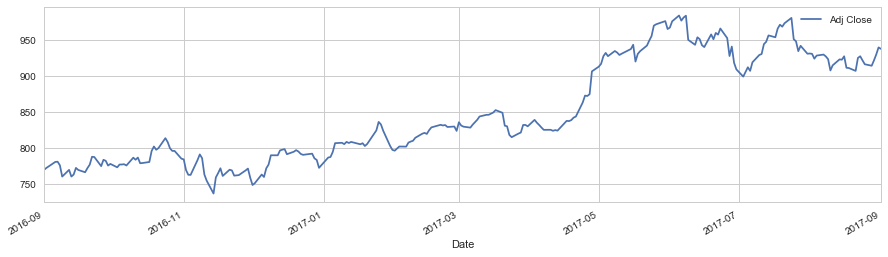

In [418]:
GOOG['Adj Close'].plot(legend=True, figsize=(15,4))

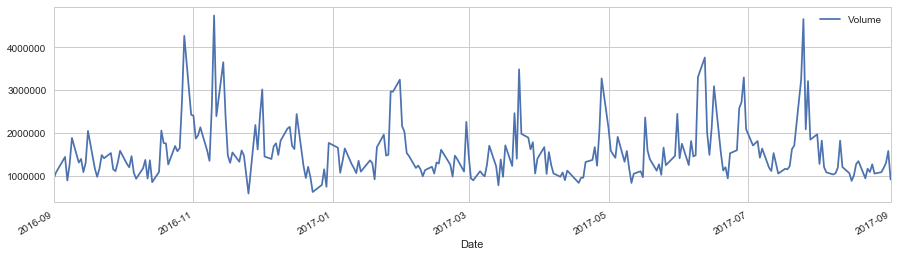

In [419]:
GOOG['Volume'].plot(legend=True, figsize=(15,4))

In [420]:
ma_days = [10,20,50]
df = GOOG['Adj Close']

for moving_avg in ma_days:
    col_name = "MA for %s days" %str(moving_avg)
    GOOG[col_name] = df.rolling(moving_avg).mean()

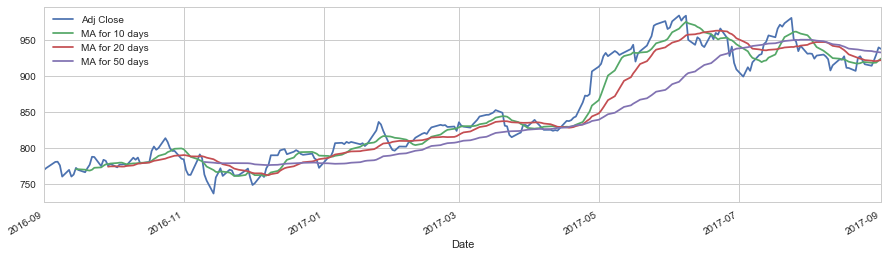

In [421]:
index = [-5,-3,-2,-1]
GOOG.iloc[:, index].plot(legend=True, figsize=(15,4))

In [422]:
GOOG['Daily Return'] = GOOG['Adj Close'].pct_change()

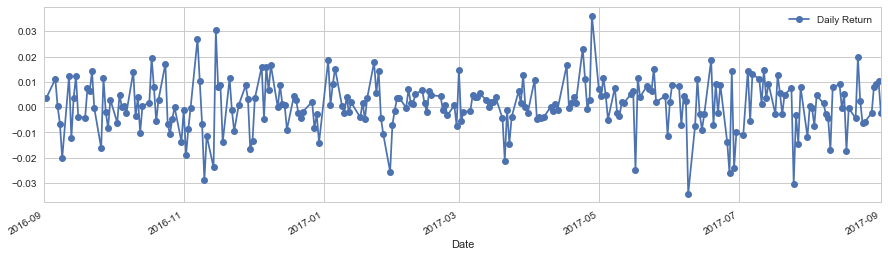

In [423]:
GOOG['Daily Return'].plot(legend=True, figsize=(15,4),marker='o')

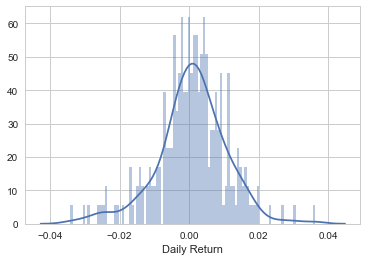

In [424]:
sns.distplot(GOOG['Daily Return'].dropna(),bins=100)

In [425]:
all_com_df = DataReader(companies[:-1], 'yahoo',start, end)['Adj Close']

In [426]:
all_com_df = all_com_df.pct_change().dropna()
all_com_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2017-08-31,-0.000305,0.002402,0.002123,0.011225
2017-08-30,-0.003963,-0.013267,-0.010390,-0.010164
2017-08-29,-0.002694,-0.013983,-0.008907,-0.012971
2017-08-28,-0.008839,-0.008427,-0.008119,-0.003012
2017-08-25,-0.009971,-0.000803,0.002276,-0.000137


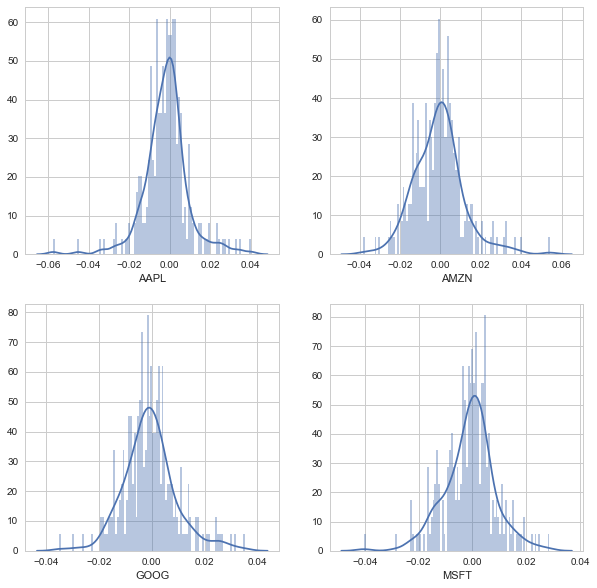

In [427]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(10,10))
sns.distplot(all_com_df.iloc[:, 0],ax=axs[0][0], bins=100)
sns.distplot(all_com_df.iloc[:, 1],ax=axs[0][1], bins=100)
sns.distplot(all_com_df.iloc[:, 2],ax=axs[1][0], bins=100)
sns.distplot(all_com_df.iloc[:, 3],ax=axs[1][1], bins=100)

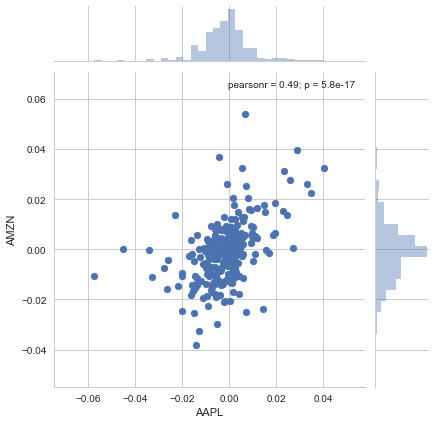

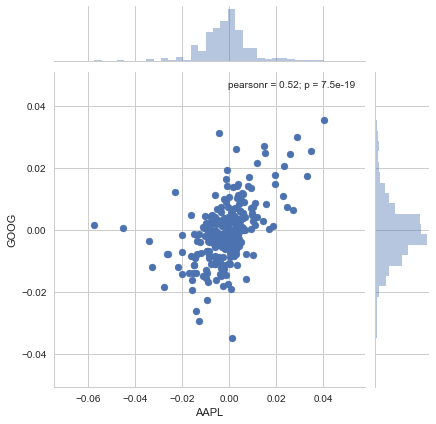

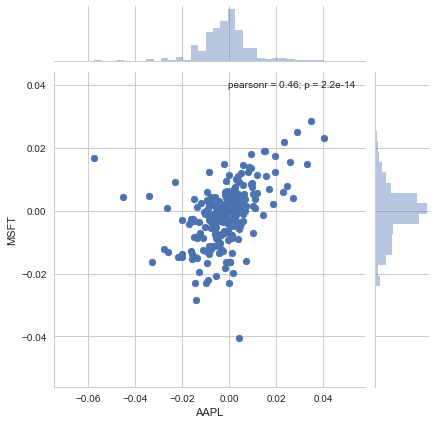

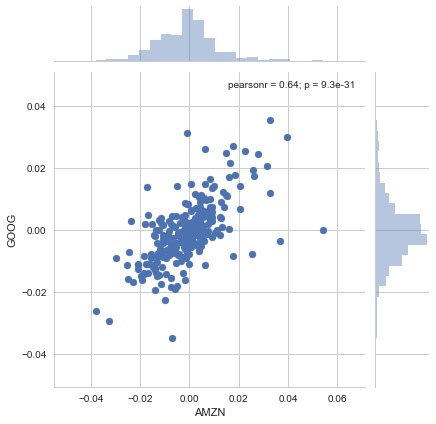

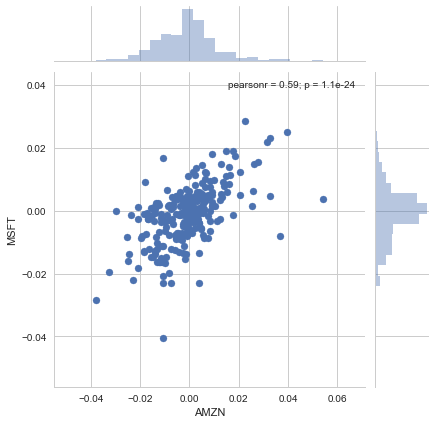

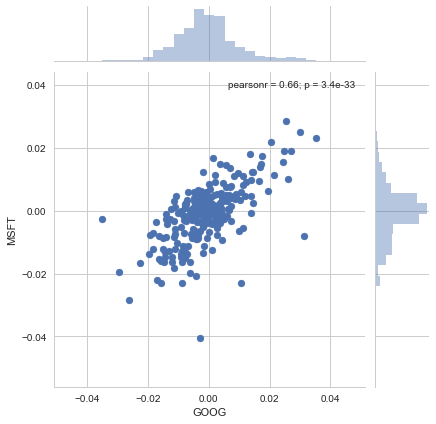

In [428]:

sns.jointplot(all_com_df.columns[0],all_com_df.columns[1],data=all_com_df)
sns.jointplot(all_com_df.columns[0],all_com_df.columns[2],data=all_com_df)
sns.jointplot(all_com_df.columns[0],all_com_df.columns[3],data=all_com_df)
sns.jointplot(all_com_df.columns[1],all_com_df.columns[2],data=all_com_df)
sns.jointplot(all_com_df.columns[1],all_com_df.columns[3],data=all_com_df)
sns.jointplot(all_com_df.columns[2],all_com_df.columns[3],data=all_com_df)

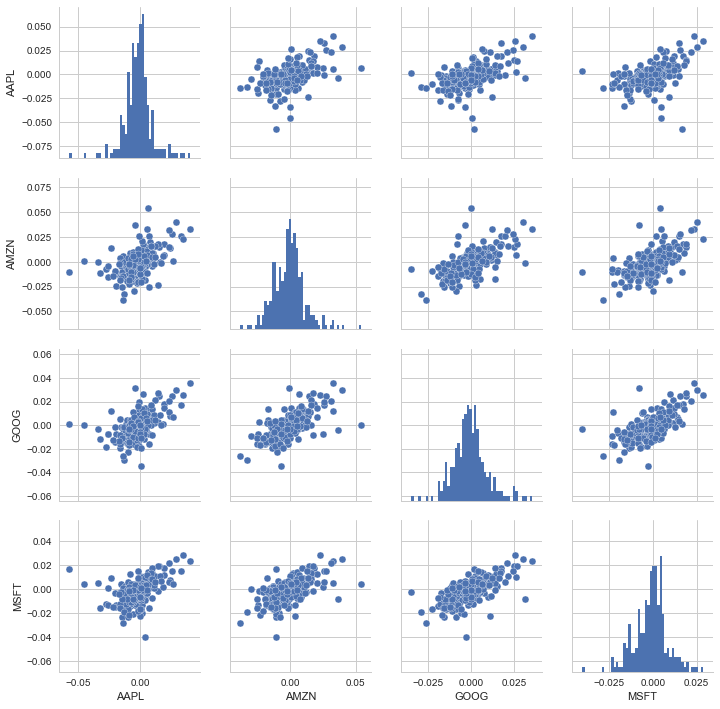

In [429]:
sns.pairplot(all_com_df,diag_kind='hist',diag_kws=dict(bins=50))

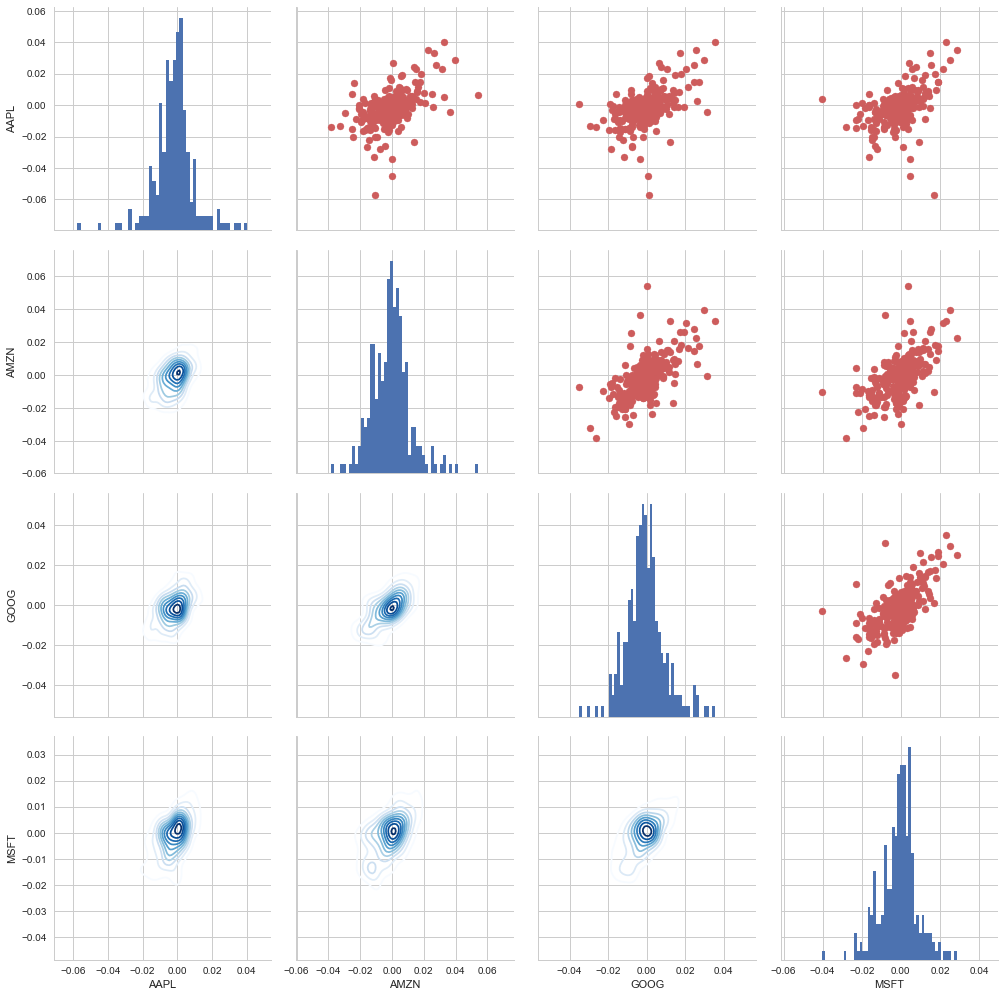

In [430]:
my_fig = sns.PairGrid(all_com_df,size=3.5, diag_sharey=False)

my_fig.map_upper(plt.scatter, color='indianred')

my_fig.map_lower(sns.kdeplot, cmap='Blues')

my_fig.map_diag(plt.hist, bins=50)

In [431]:
corr = all_com_df.corr()
for i in range(len(corr)):
    corr.set_value(corr.index[i], corr.columns[i], 0)
corr

,AAPL,AMZN,GOOG,MSFT
AAPL,0.000000,0.494708,0.519936,0.456487
AMZN,0.494708,0.000000,0.642663,0.586574
GOOG,0.519936,0.642663,0.000000,0.662317
MSFT,0.456487,0.586574,0.662317,0.000000


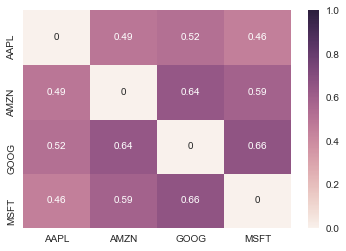

In [432]:
sns.heatmap(corr,annot=True,vmax=1)

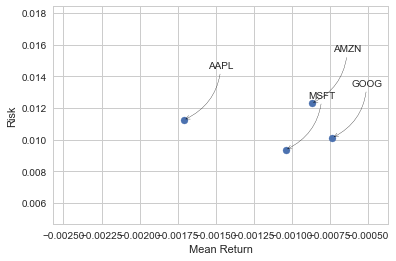

In [433]:
mean = all_com_df.mean()
std = all_com_df.std()
plt.scatter(mean,std)

plt.axis([mean.min() - abs(mean.min()/2),mean.max()+abs(mean.max()/2),std.min()-abs(std.min()/2),std.max()+abs(std.max()/2)])
plt.ylabel('Risk')
plt.xlabel('Mean Return')

for label, x, y in zip(all_com_df.columns, mean,std):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50,50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=-0.3'))

In [434]:
days = 365

dt = 1/365

mu = all_com_df.mean()['GOOG']

sigma = all_com_df.std()['GOOG']

**define a monte_corlo function to simulate the trend and of prices of certain stock**

In [358]:
def stock_monte_carlo(start_price,days,mu,sigma):
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for day in range(1,days):
        shock[day] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        drift[day] = mu * dt
        price[day] = price[day - 1] + price[day - 1] * (shock[day] + drift[day])
    
    return price

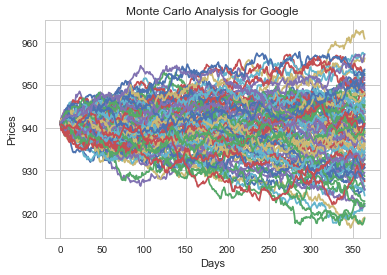

In [362]:
start_price = GOOG['Open'].iloc[len(GOOG) - 1]
for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel('Days')
plt.ylabel('Prices')
plt.title('Monte Carlo Analysis for Google')

In [364]:
runs = 10000
simu = np.zeros(runs)

for run in range(runs):
    simu[run] = stock_monte_carlo(start_price,days,mu,sigma)[days - 1]

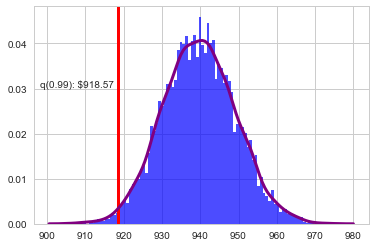

In [408]:
q = np.percentile(simu,1)

plt.figtext(0.14, 0.6, "q(0.99): $%.2f" % q)

plt.axvline(x=q, linewidth=3, color='r')

sns.distplot(simu,bins=100,color='blue',hist_kws=dict(alpha=0.7,color='blue'),kde_kws=dict(color='purple',linewidth=3))

**This graph shows that there the possibility of the price of Goole will be greater than $918.57 a year latter**